#### This is going to be an implementation of a Decision Tree 
as part of [deep-ML problem 20](https://www.deep-ml.com/problems/20).

The implementation is using the ID3 algorithm. 


In [1]:
import math
from collections import Counter

In [2]:
def calculate_entropy(labels: list) -> float:
    """Calculate the entropy of a list of labels."""
    P = [i/len(labels) for i in list(Counter(labels).values())]
    H =  sum(-p*math.log2(p) for p in P)
    return H

In [3]:
def calculate_information_gain(examples: list[dict], attr: str, target_attr: str) -> float:
    
    """
    Information gain measures the reduction in entropy achieved by splitting 
    on a particular attribute.
    Calculate the information gain of splitting on attr.
    """
    D_size = len(examples)
    labels = [example[target_attr] for example in examples]
    H = calculate_entropy(labels) # entropy of the whole set

    IG = H
    
    attr_tags_counts = Counter([example[attr] for example in examples])
    for value in attr_tags_counts.keys():
            subset = [example for example in examples if example[attr] == value]
            subset_labels = [example[target_attr] for example in subset]
            if subset_labels:
                IG -= (len(subset) / D_size) * calculate_entropy(subset_labels)
    return IG

In [4]:
def majority_class(examples: list[dict], target_attr: str) -> str:
    """Return the majority class. Break ties alphabetically."""
    labels = [example[target_attr] for example in examples]
    label_counts = Counter(labels)
    max_count = max(label_counts.values())
    
    # Get all classes with max count (tie handling)
    candidates = [label for label, count in label_counts.items() if count == max_count]
    
    # Return alphabetically first in case of tie
    return sorted(candidates)[0]

In [5]:
def learn_decision_tree(examples: list[dict], attributes: list[str], target_attr: str) -> dict:
    """Build a decision tree using the ID3 algorithm."""
    # get the unique labels from the examples 
    unique_labels = list(Counter([example[target_attr] for example in examples]))
    if len(unique_labels) == 1: # leaf perfect split
        return  unique_labels[0]
    
    if len(attributes) == 0: # leaf no more possible split
        return majority_class(examples, target_attr)
    
    # use IG
    best_attr = max(attributes, key= lambda x: calculate_information_gain(examples, x, target_attr))

    tree = {best_attr:{}}

    remaining_attributes = [attr for attr in attributes if attr!=best_attr]

    best_attr_vals = Counter([example[best_attr] for example in examples]).keys()
    for val in best_attr_vals:
        subset = [example for example in examples if example[best_attr] == val]
        tree[best_attr][val] = learn_decision_tree(subset, remaining_attributes, target_attr)

    return tree

In [6]:
import networkx as nx
import matplotlib.pyplot as plt

# Function to recursively add nodes and edges
def add_edges(graph, parent_name, subtree):
    if isinstance(subtree, dict):
        for key, value in subtree.items():
            if isinstance(value, dict):
                for subkey in value:
                    node_name = f"{key}->{subkey}"
                    graph.add_edge(parent_name, node_name)
                    add_edges(graph, node_name, value[subkey])
            else:
                node_name = f"{key}->{value}"
                graph.add_edge(parent_name, node_name)
    else:
        graph.add_edge(parent_name, subtree)

# Create the graph
def plot_graph(tree):
    G = nx.DiGraph()
    root = list(tree.keys())[0]
    G.add_node(root)
    add_edges(G, root, tree[root])

    # Draw the graph
    plt.figure(figsize=(10, 6))
    pos = nx.spring_layout(G, seed=42)  # positions for all nodes
    nx.draw(G, pos, with_labels=True, node_size=3000, node_color="lightblue", font_size=10, font_weight="bold", arrowsize=20)
    plt.show()


In [7]:
print(learn_decision_tree([ {'Outlook': 'Sunny', 'Wind': 'Weak', 'PlayTennis': 'No'}, {'Outlook': 'Overcast', 'Wind': 'Strong', 'PlayTennis': 'Yes'}, {'Outlook': 'Rain', 'Wind': 'Weak', 'PlayTennis': 'Yes'}, {'Outlook': 'Sunny', 'Wind': 'Strong', 'PlayTennis': 'No'}, {'Outlook': 'Overcast', 'Wind': 'Weak', 'PlayTennis': 'Yes'}, {'Outlook': 'Rain', 'Wind': 'Strong', 'PlayTennis': 'No'}, {'Outlook': 'Rain', 'Wind': 'Weak', 'PlayTennis': 'Yes'} ], ['Outlook', 'Wind'], 'PlayTennis'))

{'Outlook': {'Sunny': 'No', 'Overcast': 'Yes', 'Rain': {'Wind': {'Weak': 'Yes', 'Strong': 'No'}}}}


{'Outlook': {'Sunny': 'No', 'Overcast': 'Yes', 'Rain': {'Wind': {'Weak': 'Yes', 'Strong': 'No'}}}}


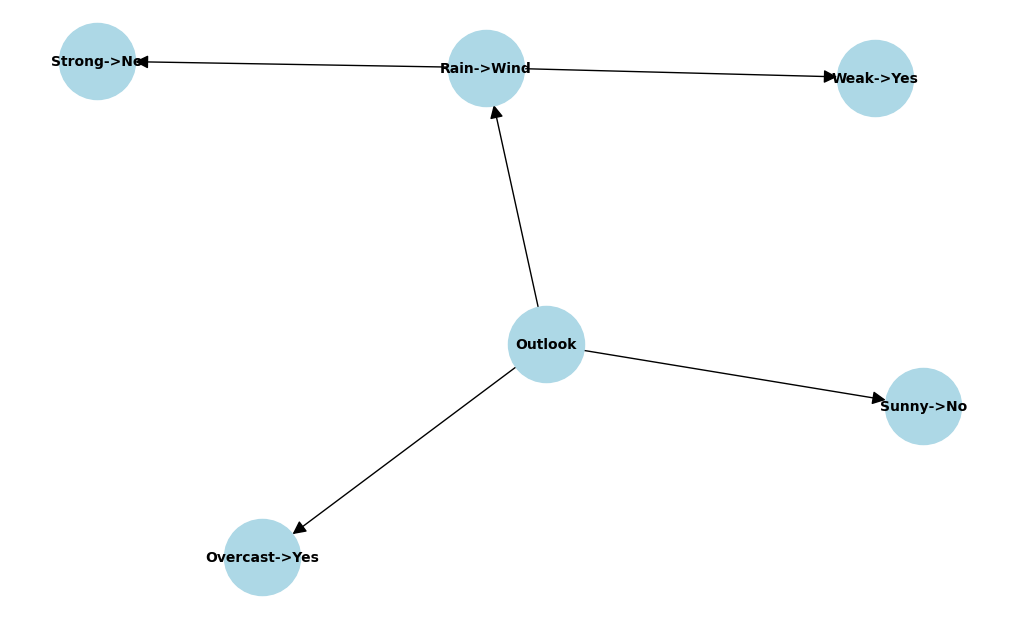

In [8]:
print(learn_decision_tree([ {'Outlook': 'Sunny', 'Wind': 'Weak', 'PlayTennis': 'No'}, {'Outlook': 'Overcast', 'Wind': 'Strong', 'PlayTennis': 'Yes'}, {'Outlook': 'Rain', 'Wind': 'Weak', 'PlayTennis': 'Yes'}, {'Outlook': 'Sunny', 'Wind': 'Strong', 'PlayTennis': 'No'}, {'Outlook': 'Overcast', 'Wind': 'Weak', 'PlayTennis': 'Yes'}, {'Outlook': 'Rain', 'Wind': 'Strong', 'PlayTennis': 'No'}, {'Outlook': 'Rain', 'Wind': 'Weak', 'PlayTennis': 'Yes'} ], ['Outlook', 'Wind'], 'PlayTennis'))
plot_graph(learn_decision_tree([ {'Outlook': 'Sunny', 'Wind': 'Weak', 'PlayTennis': 'No'}, {'Outlook': 'Overcast', 'Wind': 'Strong', 'PlayTennis': 'Yes'}, {'Outlook': 'Rain', 'Wind': 'Weak', 'PlayTennis': 'Yes'}, {'Outlook': 'Sunny', 'Wind': 'Strong', 'PlayTennis': 'No'}, {'Outlook': 'Overcast', 'Wind': 'Weak', 'PlayTennis': 'Yes'}, {'Outlook': 'Rain', 'Wind': 'Strong', 'PlayTennis': 'No'}, {'Outlook': 'Rain', 'Wind': 'Weak', 'PlayTennis': 'Yes'} ], ['Outlook', 'Wind'], 'PlayTennis'))

{'A': {'x': 'Yes', 'y': 'No'}}


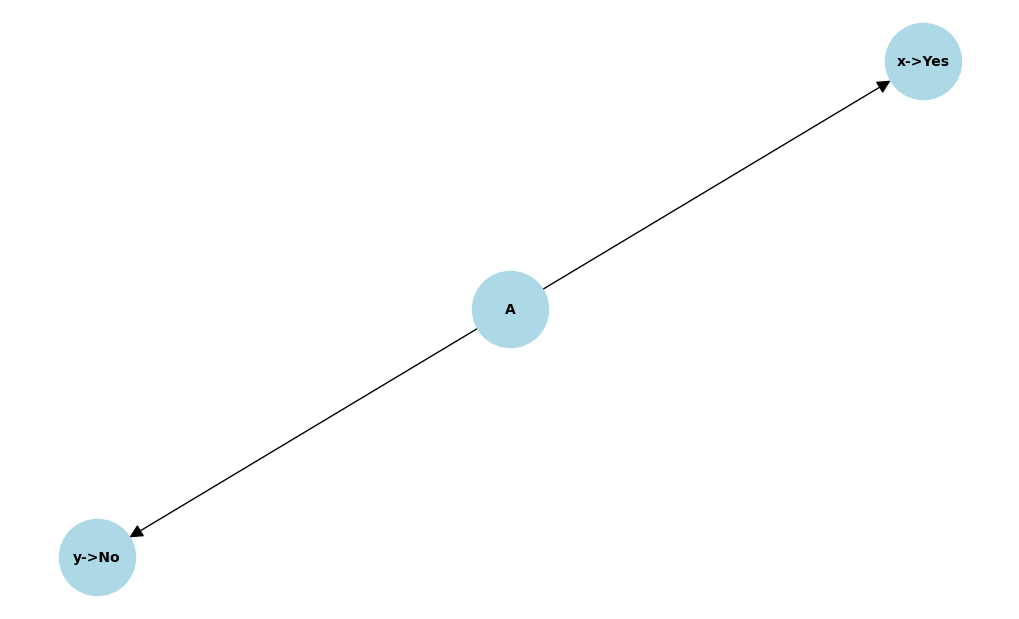

In [9]:
print(learn_decision_tree([ {'A': 'x', 'Label': 'Yes'}, {'A': 'x', 'Label': 'Yes'}, {'A': 'y', 'Label': 'No'} ], ['A'], 'Label'))
plot_graph(learn_decision_tree([ {'A': 'x', 'Label': 'Yes'}, {'A': 'x', 'Label': 'Yes'}, {'A': 'y', 'Label': 'No'} ], ['A'], 'Label'))